<a href="https://colab.research.google.com/github/hardeybisey/cov_thesis/blob/main/COVthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA DICTIONARY

* REASON: REASON FOR DISCHARGE.
* AGE: AGE.
* GENDER: PATIENTS GENDER.
* MARSTAT: MARITAL STATUS.
* EDUC: EDUCATION.
* EMPLOY:EMPLOYMENT STATUS.
* VET: VETERAN STATUS.
* LIVARAG: LIVING ARRANGEMENTS.
* ARRESTS: NUMBER OF ARRESTS IN 30 DAYS PRIOR TO ADMISSION.
* REGION: CENSUS REGION,
* METHUSE: This field identifies whether the use of Methadone or Buprenorphine is part of the client's treatment plan.
* DAYWAIT: Indicates the number of days from the first contact or request for service until the client was admitted and the first clinical service was provided.
* LOS: LENGTH OF STAY
* PSOURCE: PRINCIPAL SOURCE OF REFERRAL.
* SUB1: TYPE OF SUBTANCE (PRIMARY).
* ROUTE1: USUAL ROUTE OF ADMINISTRATION (PRIMARY).
* FREQ1: FREQUENCY OF USE (PRIMARY).
* FRSTUSE1: AGE AT FIRST USE.
* PSYPROB: Indicates whether the client has a psychiatric problem in addition to his or her alcohol or drug use problem.,
* HLTHINS : Specifies the client's health insurance (if any). The insurance may or may not cover alcohol or drug treatment.
* ALCDRUG: SUBSTANCE ABUSE TYPE.

**FOCUS OF THIS RESEARCH : Black/African American with no prior treatment episode**


# **STEPS:** 
* 1) Taking out the substet(RACE:Black/African American) from the dataset.
* 2) Taking out another substet(NOPRIOR: NO PRIOR TREATMENT EPISODES) from the dataset.
* 3) Define target variable.
* 4) Define the Predictors. 
* 5) Delete variables with missing values > 33%.
* 6) Drop rows with missing values.
* 7) Recategorise the categorical Variables.
* 8) Perform EDA on the predictors based on the target variable.
* 9) Encode Categorical Variables for machine learning.
* 10) Vallidate the best ML Model.

**Note:** SUB1: Primary substance abuse type of patient 

RESEARCH OBJECTIVES:
1) Identify a machine learning model that performs best in identifying the outcome of a SUD treatment.
2) Identify factors having greater influence in the outcome of a SUD treatment.
3) what are the

RESEARCH QUESTIONS:

1) There is no significant relationship between Type of drugs used and Treatment Success
2) There is no significant relationship between Sociodemographic factors(GENDER,AGE,EDUCATION,MARITAL STATUS)and Treatment Success 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('/Users/hardey/Desktop/COV Thesis/Data/data.csv')
df.head(3)

,Unnamed: 0,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,...,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,ALCDRUG,PSYPROB,HLTHINS
0,1,(5) 21-24,(1) MALE,(5) WHITE,(5) NOT OF HISPANIC ORIGIN,(1) NEVER MARRIED,(2) 9-11,(2) PART TIME,(2) NO,(3) INDEPENDENT LIVING,...,(1) ORAL,(2) 1-3 TIMES IN THE PAST MONTH,(3) 15-17,(1) NONE,NaN,NaN,NaN,(3) ALCOHOL AND OTHER DRUGS,NaN,NaN
1,2,(4) 18-20,(2) FEMALE,(5) WHITE,(5) NOT OF HISPANIC ORIGIN,(1) NEVER MARRIED,(1) 8 YEARS OR LESS,(3) UNEMPLOYED,(2) NO,(3) INDEPENDENT LIVING,...,(2) SMOKING,(3) 1-2 TIMES IN THE PAST WEEK,(2) 12-14,(1) NONE,NaN,NaN,NaN,(3) ALCOHOL AND OTHER DRUGS,(2) NO,NaN
2,3,(11) 50-54,(1) MALE,(5) WHITE,(5) NOT OF HISPANIC ORIGIN,(3) SEPARATED,(4) 13-15,(4) NOT IN LABOR FORCE,(2) NO,(3) INDEPENDENT LIVING,...,(1) ORAL,(2) 1-3 TIMES IN THE PAST MONTH,(11) 50-54,(2) ALCOHOL,(1) ORAL,(4) 3-6 TIMES IN THE PAST WEEK,(3) 15-17,(3) ALCOHOL AND OTHER DRUGS,(2) NO,NaN


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT', 'EDUC',
       'EMPLOY', 'VET', 'LIVARAG', 'ARRESTS', 'STFIPS', 'REGION', 'METHUSE',
       'DAYWAIT', 'REASON', 'LOS', 'PSOURCE', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'ALCDRUG', 'PSYPROB', 'HLTHINS'],
      dtype='object')

In [ ]:
df['REASON'].unique()

array(['(3) TERMINATED BY FACILITY', '(5) INCARCERATED',
       '(1) TREATMENT COMPLETED', '(2) LEFT AGAINST PROFESSIONAL ADVICE',
       '(4) TRANSFERRED TO ANOTHER TREATMENT PROGRAM OR FACILITY',
       '(7) OTHER', '(6) DEATH', nan], dtype=object)

In [ ]:
df['NOPRIOR'].unique()

array(['(2) 2 PRIOR TREATMENT EPISODES', '(3) 3 PRIOR TREATMENT EPISODES',
       '(0) NO PRIOR TREATMENT EPISODES',
       '(1) 1 PRIOR TREATMENT EPISODES',
       '(5) 5 OR MORE PRIOR TREATMENT EPISODES', nan,
       '(4) 4 PRIOR TREATMENT EPISODES'], dtype=object)

In [ ]:
df['AGE'].unique()

array(['(5) 21-24', '(4) 18-20', '(11) 50-54', '(6) 25-29', '(9) 40-44',
       '(8) 35-39', '(12) 55 AND OVER', '(10) 45-49', '(7) 30-34',
       '(3) 15-17', '(2) 12-14'], dtype=object)

In [ ]:
new_df = df[(df['RACE']=='(4) BLACK OR AFRICAN AMERICAN') & (df['NOPRIOR']=='(0) NO PRIOR TREATMENT EPISODES')].reset_index(drop=True)
new_df.drop(['SUB2','ROUTE2','FREQ2','FRSTUSE2','SUB3','ROUTE3','FREQ3','FRSTUSE3','NOPRIOR','ETHNIC','RACE','STFIPS','Unnamed: 0'],axis=1, inplace=True)

In [ ]:
new_df.shape

(125767, 21)

# Check the percentage of missing values for each column

In [ ]:
missing = {}
for col in new_df.columns:
    missing[col] = round((new_df[col].isna().sum()/len(new_df[col]))*100,2)
missing_value = pd.DataFrame({'Column':missing.keys(),'Missing %':missing.values()}).sort_values(by='Missing %',ascending=False)
missing_value.head(10)

,Column,Missing %
20,HLTHINS,59.45
10,DAYWAIT,42.78
19,PSYPROB,16.21
2,MARSTAT,13.10
5,VET,10.36
9,METHUSE,5.45
17,FRSTUSE1,2.74
16,FREQ1,2.39
13,PSOURCE,1.74
15,ROUTE1,1.64


**Drop the `HLTHINS` and `DAYWAIT` columns as they have missing values > 33%**

In [ ]:
new_df.drop(['HLTHINS','DAYWAIT'], axis =1, inplace = True)
new_df.dropna(inplace=True)

In [ ]:
new_df.shape

# Data preprocessing

In [ ]:
for col in new_df.columns:
    if new_df[col].dtype == 'float64':
        continue
    new_df[col] = new_df[col].str.lstrip('0123456789()')
    new_df[col] = new_df[col].str.strip()

In [ ]:
new_df.head(3)

,AGE,GENDER,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,ARRESTS,REGION,METHUSE,REASON,LOS,PSOURCE,SUB1,ROUTE1,FREQ1,FRSTUSE1,ALCDRUG,PSYPROB
1,40-44,MALE,"DIVORCED, WIDOWED",8 YEARS OR LESS,UNEMPLOYED,NO,DEPENDENT LIVING,NONE,MIDWEST,NO,OTHER,32.0,COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI,ALCOHOL,ORAL,DAILY,11 AND UNDER,ALCOHOL AND OTHER DRUGS,NO
2,45-49,MALE,"DIVORCED, WIDOWED",12,NOT IN LABOR FORCE,NO,DEPENDENT LIVING,NONE,MIDWEST,NO,TRANSFERRED TO ANOTHER TREATMENT PROGRAM OR FA...,31.0,COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI,COCAINE/CRACK,SMOKING,DAILY,25-29,ALCOHOL AND OTHER DRUGS,NO
4,35-39,MALE,SEPARATED,12,UNEMPLOYED,NO,DEPENDENT LIVING,NONE,MIDWEST,NO,TERMINATED BY FACILITY,35.0,INDIVIDUAL (INCLUDES SELF-REFERRAL),HEROIN,INHALATION,DAILY,15-17,OTHER DRUGS ONLY,YES


In [ ]:
unique = {}
for col in new_df.columns:
    if new_df[col].dtype == 'float64':
        pass
    else:
        unique[col] = new_df[col].unique()

**Recategorizing the categorical variables**

In [ ]:
education = {'8 YEARS OR LESS':'8th GRADE & LESS',
             '9-11':'9TH GRADE',
             '12':'12th GRADE',
             '13-15':'ASSOCIATE DEGREE',
             '16 OR MORE': 'BACHELOR DEGREE & HIGHER'}
route = ['ORAL','SMOKING', 'INHALATION','OTHER','INJECTION (IV OR INTRAMUSCULAR)']
reason = ['TREATMENT COMPLETED']
past_30_days_use = {'DAILY':'DAILY',
                    'NO USE IN THE PAST MONTH': 'NOT IN THE PAST MONTH',
                    '1-3 TIMES IN THE PAST MONTH': '1-3 TIMES PAST MONTH',
                    '3-6 TIMES IN THE PAST WEEK':'3-6 TIMES PAST WEEK',
                    '1-2 TIMES IN THE PAST WEEK':'1-2 TIMES PAST WEEK'}
referral = {'INDIVIDUAL (INCLUDES SELF-REFERRAL)':'SELF',
       'COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI':'COURT',
       'OTHER COMMUNITY REFERRAL':'COMMUNITY REFERRAL',
       'OTHER HEALTH CARE PROVIDER':'HEALTH CARE',
       'ALCOHOL/DRUG ABUSE CARE PROVIDER':'ALCOHOL/DRUG ABUSE CARE', 
       'SCHOOL (EDUCATIONAL)':'SCHOOL',
       'EMPLOYER/EAP':'EMPLOYER'}
arrests = {'NONE':'0',
           'ONCE':'1',
           '2 OR MORE TIMES':'2 OR MORE'}
subtance = {'OTHER DRUGS ONLY':'DRUGS',
              'ALCOHOL AND OTHER DRUGS':'ALCOHOL AND DRUGS',
              'ALCOHOL ONLY':'ALCOHOL'}

In [ ]:
def subtance_type(x):
    subtances = ['ALCOHOL','COCAINE/CRACK','MARIJUANA/HASHISH','HEROIN','METHAMPHETAMINE']
    if x in subtances:
        return x 
    else:
        return 'OTHERS'

In [ ]:
def sud_route(route):
    if route == 'INJECTION (IV OR INTRAMUSCULAR)':
        return 'INJECTION'
    else:
        return route

In [ ]:
def length_of_stay(los):
    if los<=30:
        return los
    elif los==31:
        return '31-45'
    elif los==32:
        return '46-60'
    elif los==33:
        return '61-90'
    elif los==34:
        return '91-120'
    elif los==35:
        return '121-180'
    elif los>=36:
        return '121 OR LONGER'

In [ ]:
def age_group(age):
    if age in ['12-14','15-17']:
        return '12-17'
    elif age in ['18-20','21-24']:
        return '18-24'
    elif age in ['25-29','30-34']:
        return '25-34'
    elif age in ['35-39','40-44']:
        return '35-44'
    elif age in ['45-49','50-54']:
        return '45-54'
    else:
        return age

**Applying transformation on the columns to recategorized the variables**

In [ ]:
new_df['EDUC'] = new_df['EDUC'].map(education)
new_df['SUB1'] = new_df['SUB1'].apply(subtance_type)
new_df['ROUTE1'] = new_df['ROUTE1'].apply(sud_route)
new_df['FREQ1'] = new_df['FREQ1'].map(past_30_days_use)
new_df['REASON'] = new_df['REASON'].apply(lambda x: 'SUCCESS' if x =='TREATMENT COMPLETED' else 'FAILURE')
new_df['PSOURCE'] = new_df['PSOURCE'].map(referral)
new_df['ARRESTS'] = new_df['ARRESTS'].map(arrests)
new_df['LOS'] = new_df['LOS'].apply(length_of_stay)
new_df['ALCDRUG']= new_df['ALCDRUG'].map(subtance)
new_df['AGE'] = new_df['AGE'].apply(age_group)
new_df['FRSTUSE1'] = new_df['FRSTUSE1'].apply(age_group)

In [ ]:
new_df.shape

(77606, 19)

<!-- **Drop the old columns and rows with missing values**  -->
**New dataframe after recategorizing the variables**

In [ ]:
new_df.head(3)

,AGE,GENDER,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,ARRESTS,REGION,METHUSE,REASON,LOS,PSOURCE,SUB1,ROUTE1,FREQ1,FRSTUSE1,ALCDRUG,PSYPROB
1,35-44,MALE,"DIVORCED, WIDOWED",8th GRADE & LESS,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,FAILURE,46-60,COURT,ALCOHOL,ORAL,DAILY,11 AND UNDER,ALCOHOL AND DRUGS,NO
2,45-54,MALE,"DIVORCED, WIDOWED",12th GRADE,NOT IN LABOR FORCE,NO,DEPENDENT LIVING,0,MIDWEST,NO,FAILURE,31-45,COURT,COCAINE/CRACK,SMOKING,DAILY,25-34,ALCOHOL AND DRUGS,NO
4,35-44,MALE,SEPARATED,12th GRADE,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,FAILURE,121-180,SELF,HEROIN,INHALATION,DAILY,12-17,DRUGS,YES


In [ ]:
new_df.describe().T

,count,unique,top,freq
AGE,77606,6,25-34,19886
GENDER,77606,2,MALE,57160
MARSTAT,77606,4,NEVER MARRIED,59132
EDUC,77606,5,9TH GRADE,29578
EMPLOY,77606,4,UNEMPLOYED,34561
VET,77606,2,NO,75410
LIVARAG,77606,3,INDEPENDENT LIVING,51557
ARRESTS,77606,3,0,71128
REGION,77606,5,SOUTH,30976
METHUSE,77606,2,NO,75836


In [ ]:
final = new_df.copy()
final.to_csv('final.csv',index=False)

################################################################################################################

In [3]:
# Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


# FeatureHasher
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



# ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



# Model Evaluations
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay,RocCurveDisplay,roc_curve,auc


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
# sns.set_theme(palette='winter') #style="whitegrid"

In [5]:
final = pd.read_csv('final.csv')

In [5]:
final['REASON'].value_counts()

FAILURE    50622
SUCCESS    26984
Name: REASON, dtype: int64

In [6]:
uniquecount = {}
uniqueratio = {}
for col in final.columns:
    uniquecount[col] = final[col].value_counts()
    uniqueratio[col] = final[col].value_counts(normalize=True).mul(100)

# EDA

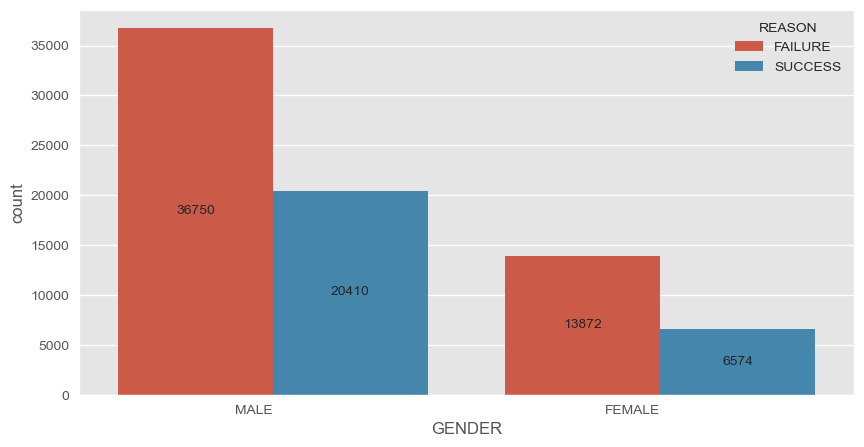

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='GENDER',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

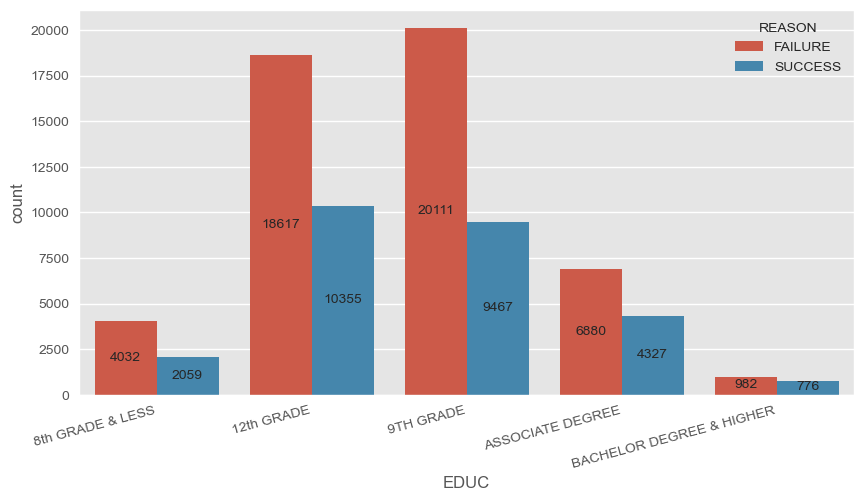

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='EDUC',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(),rotation=15, ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

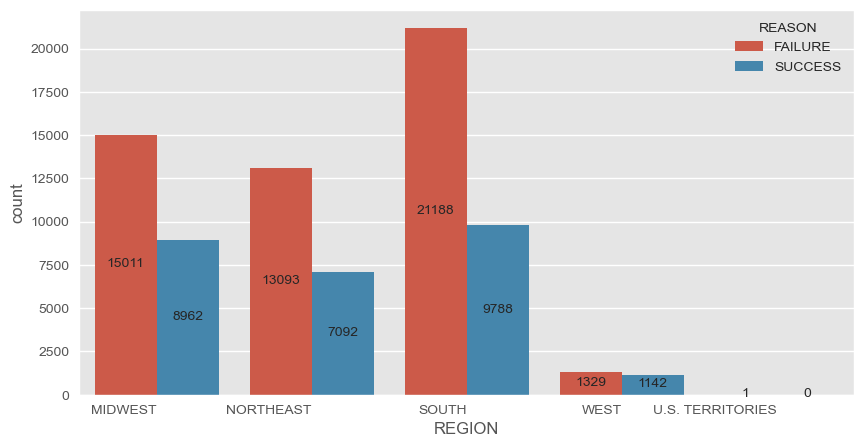

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='REGION',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

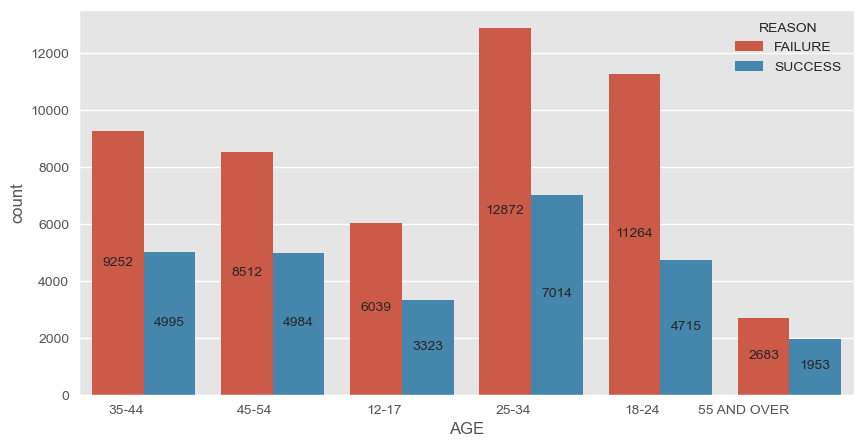

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='AGE',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

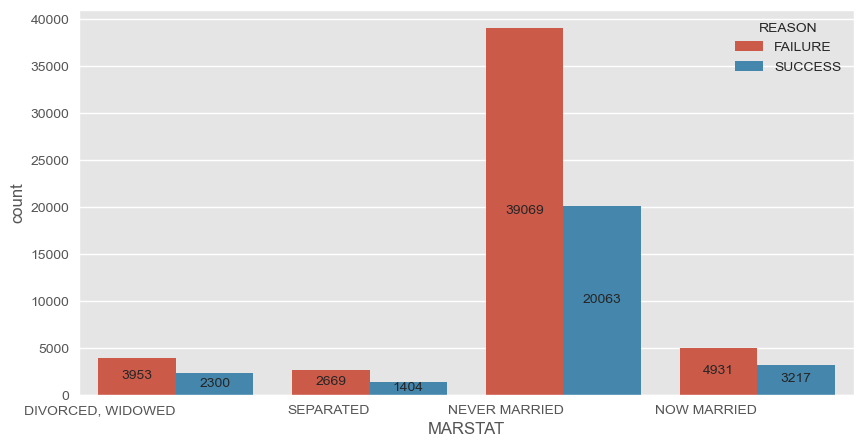

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='MARSTAT',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

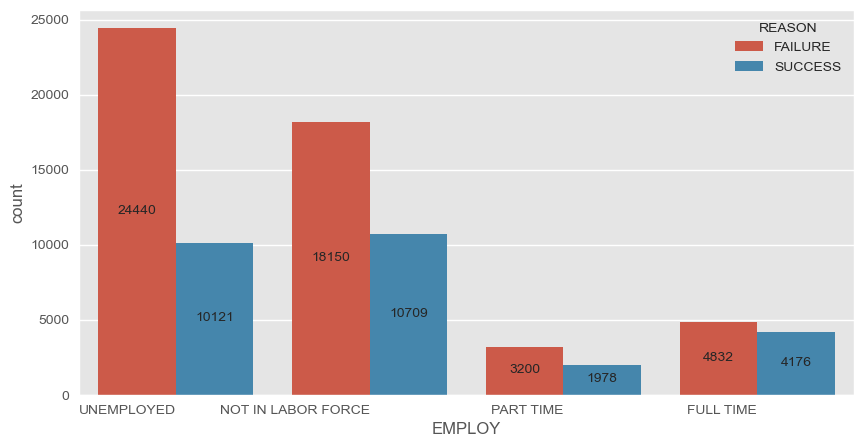

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='EMPLOY',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

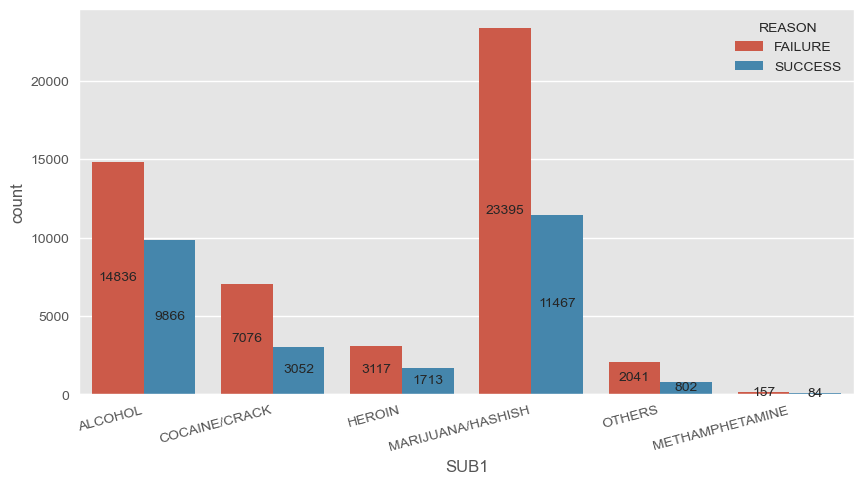

In [ ]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(data=final,x='SUB1',hue='REASON')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15,ha='right')
for labels in ax.containers:
    ax.bar_label(labels,label_type='center',padding=0.5)

# Preparing the data for machine learning:
* 1) recategorize the categorical columns

In [6]:
mapper = {'AGE': {'12-17':2,'18-24':3, '25-34':4,'35-44':5, '45-54':6,'55 AND OVER':7},
          'EDUC' : {'8th GRADE & LESS':1,'9TH GRADE':2, '12th GRADE':3,  'ASSOCIATE DEGREE':4,'BACHELOR DEGREE & HIGHER':5},
          'ARRESTS' : {'0':0, '1':1, '2 OR MORE':2},
          'REASON' : {'FAILURE':0, 'SUCCESS':1},
          'FREQ1' : {'NOT IN THE PAST MONTH':1, '1-3 TIMES PAST MONTH':2,'3-6 TIMES PAST WEEK':3, '1-2 TIMES PAST WEEK':4,'DAILY':5},
          'FRSTUSE1' :  {'11 AND UNDER':1,'12-17':2,'18-24':3,'25-34':4,'35-44':5, '45-54':6,'55 AND OVER':7}}
los = { '31-45':31,'46-60':32,'61-90':33,'91-120':34,'121-180':35,'121 OR LONGER':36}

In [7]:
columns = ['AGE','SUB1','ALCDRUG','MARSTAT','LIVARAG','EMPLOY','ARRESTS','REGION','VET','METHUSE','EDUC','ROUTE1','FRSTUSE1','LOS','PSOURCE']
ord_cat = ['AGE','EDUC','ARRESTS','REASON','FREQ1','FRSTUSE1']

In [8]:
for columns in ord_cat:
    final[columns] = final[columns].map(mapper[columns])

In [9]:
final['LOS'] = final['LOS'].apply(lambda x: los[x] if x in los.keys() else x).astype('float')

In [10]:
final.head(3)

,AGE,GENDER,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,ARRESTS,REGION,METHUSE,REASON,LOS,PSOURCE,SUB1,ROUTE1,FREQ1,FRSTUSE1,ALCDRUG,PSYPROB
0,5,MALE,"DIVORCED, WIDOWED",1,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,0,32.0,COURT,ALCOHOL,ORAL,5,1,ALCOHOL AND DRUGS,NO
1,6,MALE,"DIVORCED, WIDOWED",3,NOT IN LABOR FORCE,NO,DEPENDENT LIVING,0,MIDWEST,NO,0,31.0,COURT,COCAINE/CRACK,SMOKING,5,4,ALCOHOL AND DRUGS,NO
2,5,MALE,SEPARATED,3,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,0,35.0,SELF,HEROIN,INHALATION,5,2,DRUGS,YES


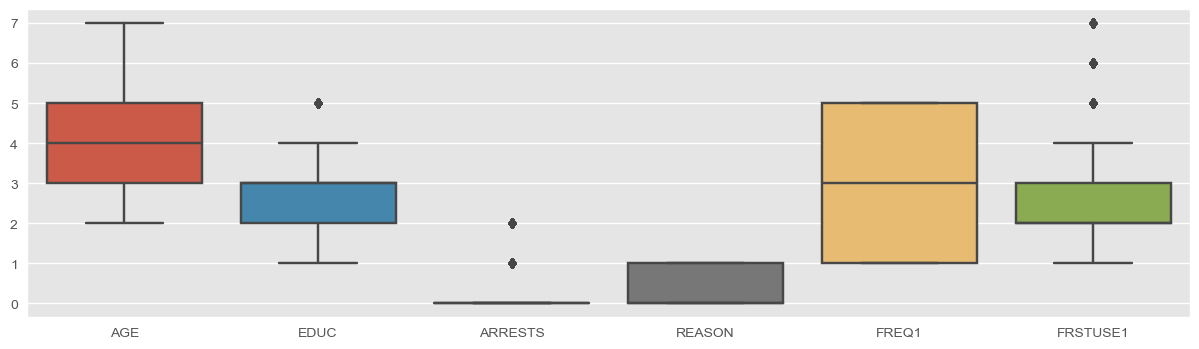

In [ ]:
plt.subplots(figsize=(15,4))
sns.boxplot(final[ord_cat])
plt.show()

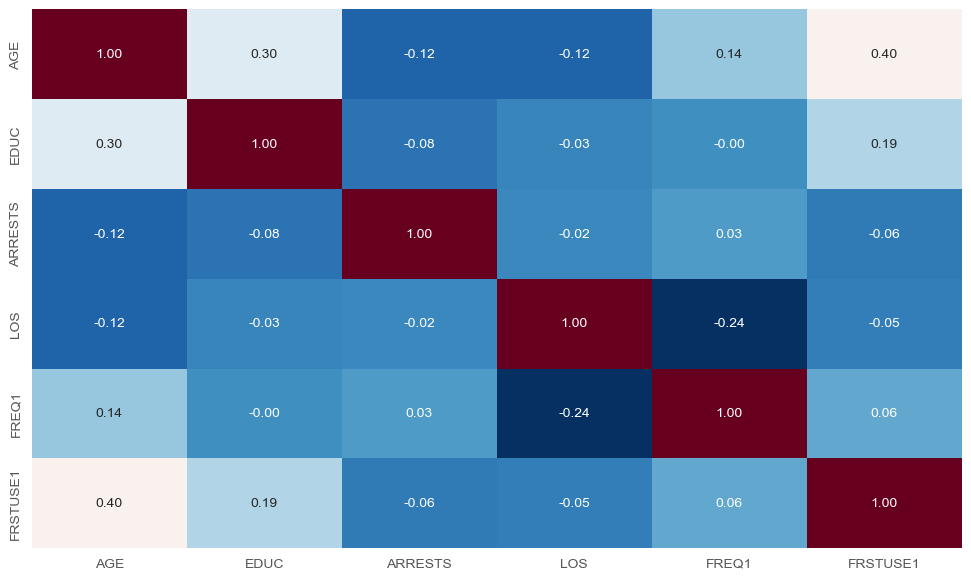

In [ ]:
# correlation maxtrix with heatmat
corr = final.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='RdBu_r',cbar=False)  
plt.show()           

In [26]:
transformer = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False),selector(dtype_include=object))],
    remainder='passthrough')

In [24]:
models = {'Logistic Regression':LogisticRegression(solver='liblinear', penalty='l2', C=10,random_state=42),
          'GaussianNB':GaussianNB(var_smoothing = 4.328761281083062e-05),
          'XGBClassifier':XGBClassifier(random_state=42,reg_lambda= 5,reg_alpha= 0.5,n_estimators= 500,learning_rate= 0.05,gamma=1,booster='gbtree',base_score=0.5),
         'KNeighborsClassifier':KNeighborsClassifier(p=1,n_neighbors=22,leaf_size=2),
          'RandomForestClassifier':RandomForestClassifier(random_state=42,n_estimators=210,min_samples_split=10,min_samples_leaf= 7,max_depth = None)}

In [27]:
X = final.drop('REASON',axis=1)
y = final['REASON']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle= True)

              precision    recall  f1-score   support

           0       0.69      0.91      0.78     15142
           1       0.57      0.23      0.33      8140

    accuracy                           0.67     23282
   macro avg       0.63      0.57      0.55     23282
weighted avg       0.65      0.67      0.62     23282



<Figure size 360x288 with 0 Axes>

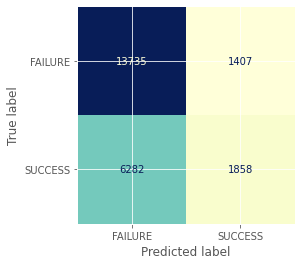

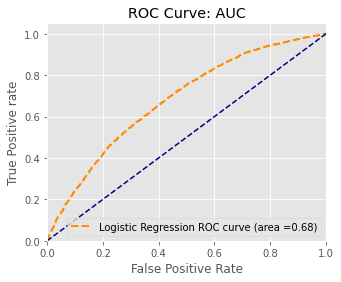

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     15142
           1       0.49      0.43      0.46      8140

    accuracy                           0.64     23282
   macro avg       0.60      0.59      0.60     23282
weighted avg       0.63      0.64      0.64     23282



<Figure size 360x288 with 0 Axes>

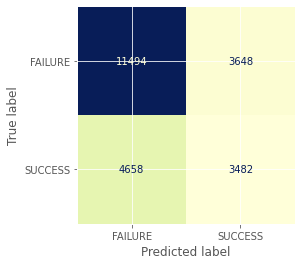

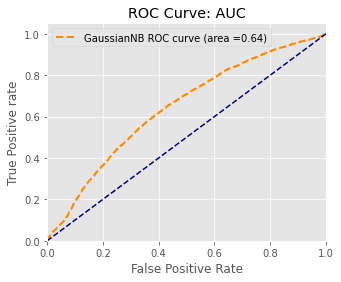

              precision    recall  f1-score   support

           0       0.74      0.87      0.80     15142
           1       0.64      0.42      0.51      8140

    accuracy                           0.71     23282
   macro avg       0.69      0.65      0.65     23282
weighted avg       0.70      0.71      0.70     23282



<Figure size 360x288 with 0 Axes>

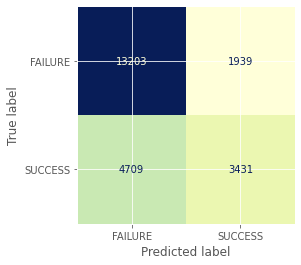

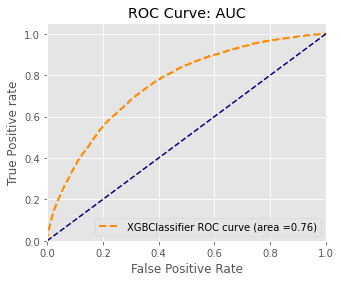

              precision    recall  f1-score   support

           0       0.74      0.86      0.79     15142
           1       0.62      0.42      0.50      8140

    accuracy                           0.71     23282
   macro avg       0.68      0.64      0.65     23282
weighted avg       0.70      0.71      0.69     23282



<Figure size 360x288 with 0 Axes>

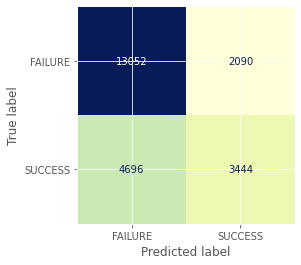

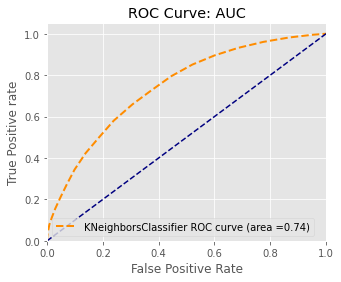

              precision    recall  f1-score   support

           0       0.73      0.90      0.80     15142
           1       0.67      0.37      0.48      8140

    accuracy                           0.72     23282
   macro avg       0.70      0.64      0.64     23282
weighted avg       0.71      0.72      0.69     23282



<Figure size 360x288 with 0 Axes>

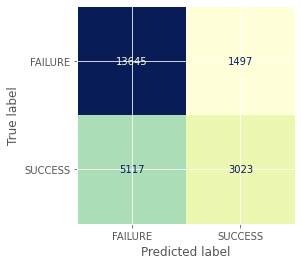

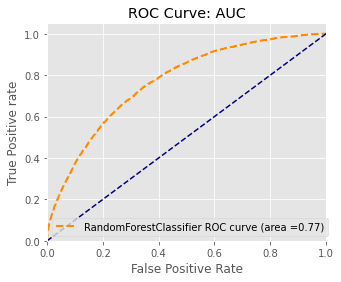

In [28]:
score = {}
for index,model in enumerate(models.keys()):
    pipeline = pipeline = Pipeline(  
        steps=[
            ('transformer', transformer),
            ('model', models[model])])
    pipeline.fit(X_train, y_train)
    score[model] = pipeline.score(X_test,y_test)
    pred = pipeline.predict(X_test)
    print(classification_report(y_test,pred))
    plt.figure(figsize=(5,4))
    ConfusionMatrixDisplay.from_predictions(y_test,pred,labels = pipeline.classes_,colorbar=False,cmap='YlGnBu',display_labels=['FAILURE','SUCCESS'])
    plt.savefig('cf'+model+str(np.random.randint(100)),dpi=300)
    plt.show()
    pred_prob = pipeline.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    area = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, linestyle='--',lw = 2,color='darkorange',label=f"{model} ROC curve (area ={round(area,2)})")
    plt.plot([0,1], [0,1], linestyle='--', color='navy')
    plt.title('ROC Curve: AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="best")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.savefig(model+str(np.random.randint(100)),dpi=300)
    plt.show()

In [35]:
score

{'Logistic Regression': 0.6697448672794434,
 'GaussianNB': 0.643243707585259,
 'XGBClassifier': 0.7144575208315437,
 'KNeighborsClassifier': 0.7085301950004295,
 'RandomForestClassifier': 0.7159178764710935}

In [34]:
resample_score

{'Logistic Regression': 0.6202216304441199,
 'GaussianNB': 0.5579847092174212,
 'XGBClassifier': 0.7119233742805601,
 'KNeighborsClassifier': 0.6834893909457951,
 'RandomForestClassifier': 0.7159178764710935}

In [30]:
resample_transformer = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False),selector(dtype_include=object))],
    remainder='passthrough')
sm = SMOTE(random_state=42)

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     15142
           1       0.47      0.65      0.55      8140

    accuracy                           0.62     23282
   macro avg       0.62      0.63      0.61     23282
weighted avg       0.66      0.62      0.63     23282



<Figure size 360x288 with 0 Axes>

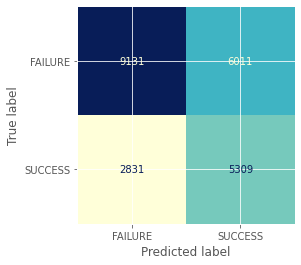

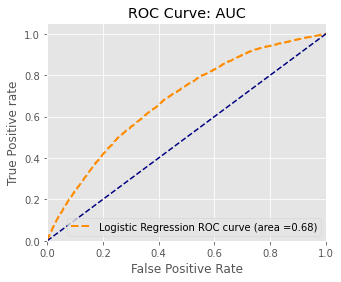

              precision    recall  f1-score   support

           0       0.76      0.47      0.58     15142
           1       0.42      0.72      0.53      8140

    accuracy                           0.56     23282
   macro avg       0.59      0.59      0.56     23282
weighted avg       0.64      0.56      0.56     23282



<Figure size 360x288 with 0 Axes>

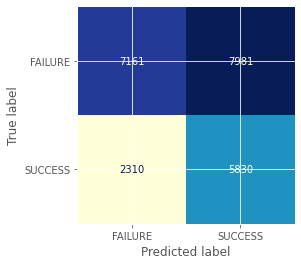

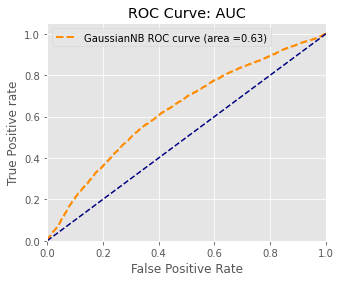

              precision    recall  f1-score   support

           0       0.76      0.81      0.79     15142
           1       0.60      0.52      0.56      8140

    accuracy                           0.71     23282
   macro avg       0.68      0.67      0.67     23282
weighted avg       0.70      0.71      0.71     23282



<Figure size 360x288 with 0 Axes>

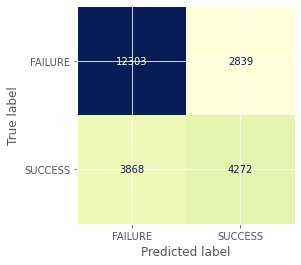

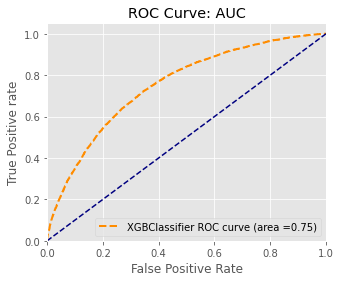

              precision    recall  f1-score   support

           0       0.78      0.71      0.75     15142
           1       0.54      0.63      0.58      8140

    accuracy                           0.68     23282
   macro avg       0.66      0.67      0.66     23282
weighted avg       0.70      0.68      0.69     23282



<Figure size 360x288 with 0 Axes>

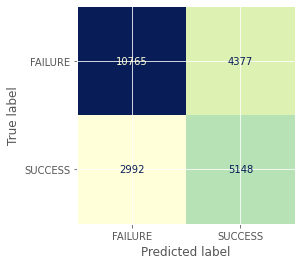

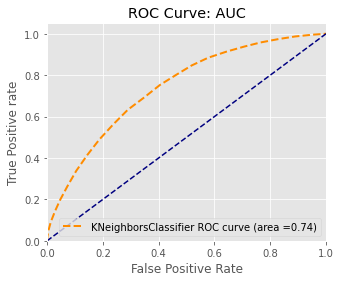

              precision    recall  f1-score   support

           0       0.77      0.80      0.79     15142
           1       0.60      0.56      0.58      8140

    accuracy                           0.72     23282
   macro avg       0.69      0.68      0.68     23282
weighted avg       0.71      0.72      0.71     23282



<Figure size 360x288 with 0 Axes>

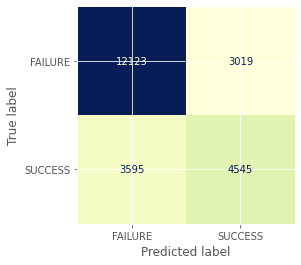

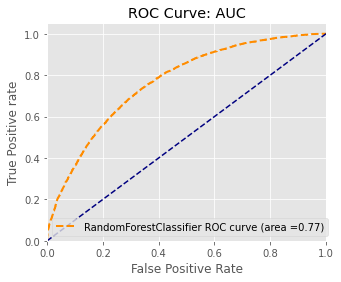

In [36]:
resample_score = {}
for index,model in enumerate(models.keys()):
    pipeline = Pipeline(  
        steps=[
            ('transformer', transformer),
            ('smoth',sm),
            ('model', models[model])])
    pipeline.fit(X_train, y_train)
    resample_score[model] = pipeline.score(X_test,y_test)
    pred = pipeline.predict(X_test)
    print(classification_report(y_test,pred))
    plt.figure(figsize=(5,4))
    ConfusionMatrixDisplay.from_predictions(y_test,pred,labels = pipeline.classes_,colorbar=False,cmap='YlGnBu',display_labels=['FAILURE','SUCCESS'])
    plt.savefig('cf'+model+str(np.random.randint(100)),dpi=300)
    plt.show()
    pred_prob = pipeline.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    area = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, linestyle='--',lw = 2,color='darkorange',label=f"{model} ROC curve (area ={round(area,2)})")
    plt.plot([0,1], [0,1], linestyle='--', color='navy')
    plt.title('ROC Curve: AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="best")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    # plt.savefig(model+str(np.random.randint(100)),dpi=300)
    plt.show()

In [41]:
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c69248160>)])),
                ('smoth', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=7,
                                        min_samples_split=10, n_estimators=210,
                                        random_state=42))])

In [150]:
importance = pipeline.named_steps['model'].feature_importances_
feature = pipeline.named_steps['transformer'].get_feature_names_out()
feature_imp = list(zip(feature,importance))
feature_imp_df = pd.DataFrame(feature_imp,columns=['feature','importance']).sort_values(by='importance',ascending=False)

In [151]:
feature_imp_df['feature'] = feature_imp_df['feature'].apply(lambda x: x.lstrip('one_hot_'))
feature_imp_df['feature'] = feature_imp_df['feature'].apply(lambda x: x.lstrip('remainder_'))

In [152]:
feature_imp_df.head(5)

,feature,importance
36,LOS,0.228918
37,FREQ1,0.068939
32,PSYPROB_YES,0.059654
33,AGE,0.051035
11,REGION_SOUTH,0.046720


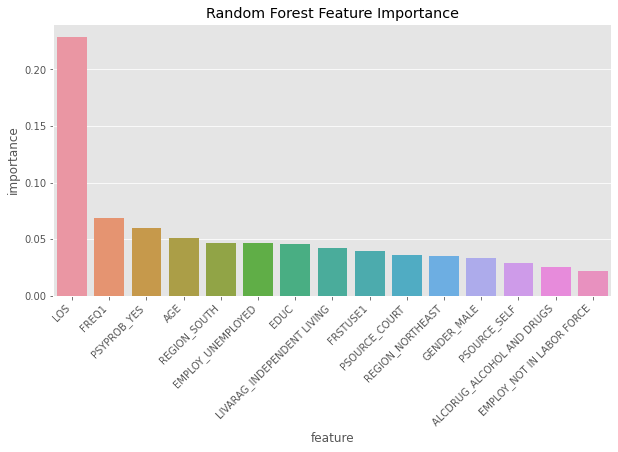

In [159]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='feature',y='importance',data = feature_imp_df[:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set(title='Random Forest Feature Importance')
plt.show()

In [22]:
lr_grid = {'model__C': [100, 10, 1.0, 0.1, 0.01],
                'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'model__penalty' :['l2']}
g_nb_grid = {'model__var_smoothing': np.logspace(0,-9, num=100)}
xg_b_grid = { 'model__n_estimators': [100, 200, 500],
            'model__learning_rate': [0.01,0.05,0.1],
            'model__booster': ['gbtree', 'gblinear'],
            'model__gamma': [0, 0.5, 1],
            'model__reg_alpha': [0, 0.5, 1],
            'model__reg_lambda': [0.5, 1, 5],
            'model__base_score': [0.2, 0.5, 1]}
rf_grid = {'model__n_estimators': np.arange(10, 1000, 50),
           'model__max_depth': [None, 3, 5, 10],
           'model__min_samples_split': np.arange(2, 20, 2),
           'model__min_samples_leaf': np.arange(1, 20, 2)}
knn_grid = {'model__leaf_size' :list(range(1,50)),
            'model__n_neighbors' :list(range(1,30)),
            'model__p':[1,2]}
params = {'Logistic Regression':lr_grid,'GaussianNB':g_nb_grid,'XGBClassifier':xg_b_grid,'RandomForestClassifier':rf_grid,'KNeighborsClassifier':knn_grid}


In [23]:
grid_score = {}
best_param = {}
for model in models.keys():
    pipeline = pipeline = Pipeline(  
        steps=[
            ('transformer', transformer),
            ('smoth',sm),
            ('model', models[model])])
    grid = RandomizedSearchCV(pipeline,params[model],cv=5,scoring='accuracy',verbose=0,n_jobs=-1,n_iter=20)
    # grid = GridSearchCV(pipeline,params[model],cv=5,scoring='accuracy',verbose=0,n_jobs=-1)
    grid.fit(X_train, y_train)
    grid_score[model] = grid.score(X_test,y_test)
    best_param[model] = grid.best_estimator_
    print("%s Best:%f using %s" % (model,grid.best_score_, grid.best_params_))
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    param = grid.cv_results_['params']
    for mean, stdev, param_ in zip(means, stds, param):
        print("%f (%f) with: %r" % (mean, stdev, param_))

RandomForestClassifier Best:0.712834 using {'model__n_estimators': 210, 'model__min_samples_split': 10, 'model__min_samples_leaf': 7, 'model__max_depth': None}
0.706262 (0.005289) with: {'model__n_estimators': 860, 'model__min_samples_split': 4, 'model__min_samples_leaf': 19, 'model__max_depth': None}
0.666004 (0.003060) with: {'model__n_estimators': 310, 'model__min_samples_split': 14, 'model__min_samples_leaf': 9, 'model__max_depth': 5}
0.694408 (0.003857) with: {'model__n_estimators': 360, 'model__min_samples_split': 14, 'model__min_samples_leaf': 1, 'model__max_depth': 10}
0.710772 (0.004589) with: {'model__n_estimators': 710, 'model__min_samples_split': 16, 'model__min_samples_leaf': 11, 'model__max_depth': None}
0.645000 (0.004195) with: {'model__n_estimators': 560, 'model__min_samples_split': 8, 'model__min_samples_leaf': 7, 'model__max_depth': 3}
0.707845 (0.004723) with: {'model__n_estimators': 810, 'model__min_samples_split': 16, 'model__min_samples_leaf': 15, 'model__max_dep

In [37]:
best_param

{'RandomForestClassifier': Pipeline(steps=[('transformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('onehot',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore',
                                                                 sparse=False),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0c691573d0>)])),
                 ('smoth', SMOTE(random_state=42)),
                 ('model',
                  RandomForestClassifier(min_samples_leaf=7,
                                         min_samples_split=10, n_estimators=210,
                                         random_state=42))])}

In [ ]:
feature_names = pipeline[-1].get_feature_names_out()
mdi_importances = pd.Series(model[-1].feature_importances_, index=feature_names).sort_values(ascending=True)

**Creating dummy variables for the categorical features using OneHotEncoder**

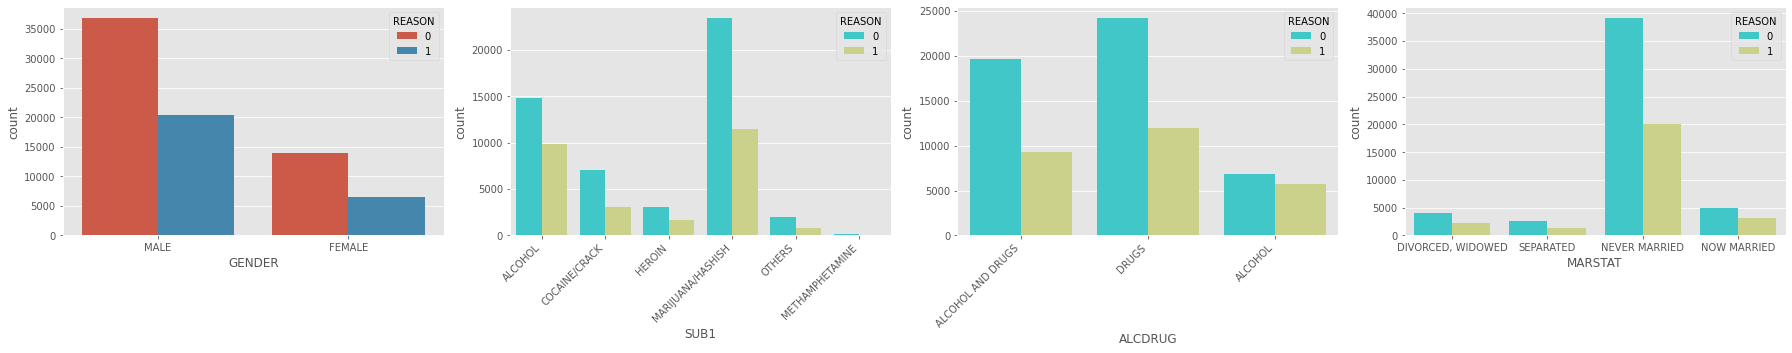

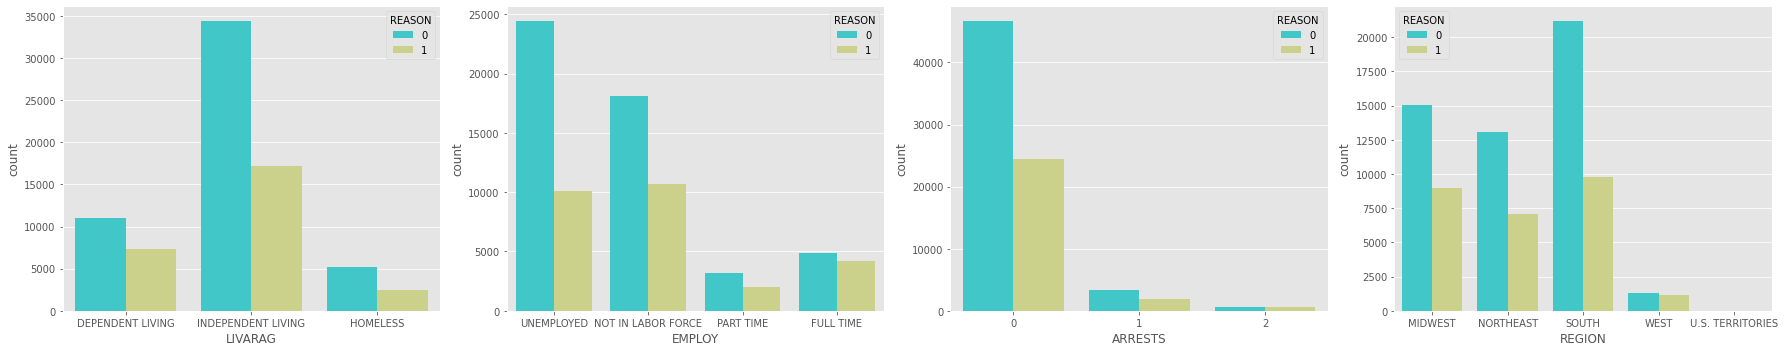

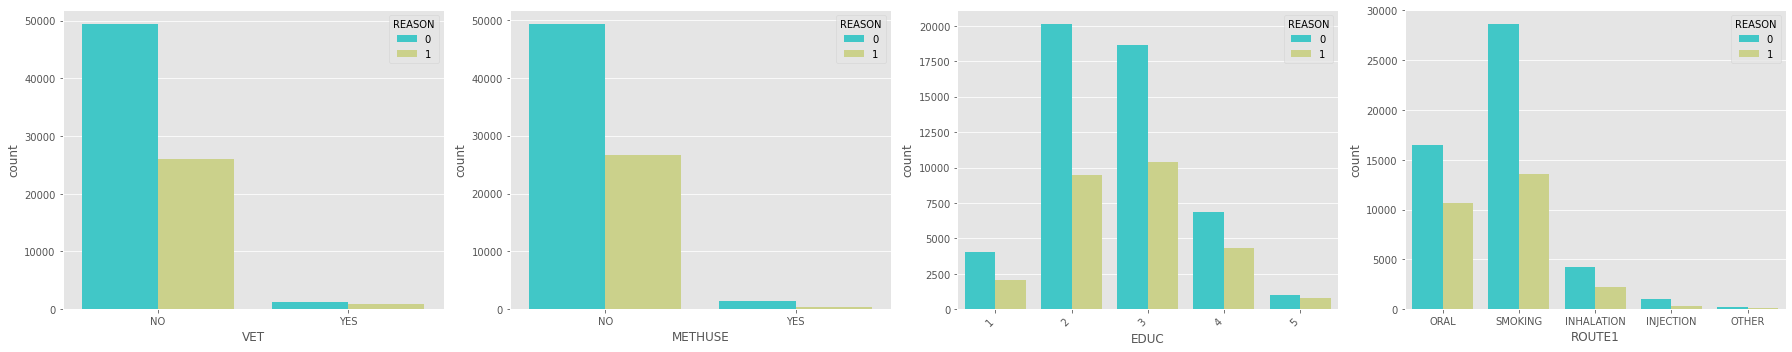

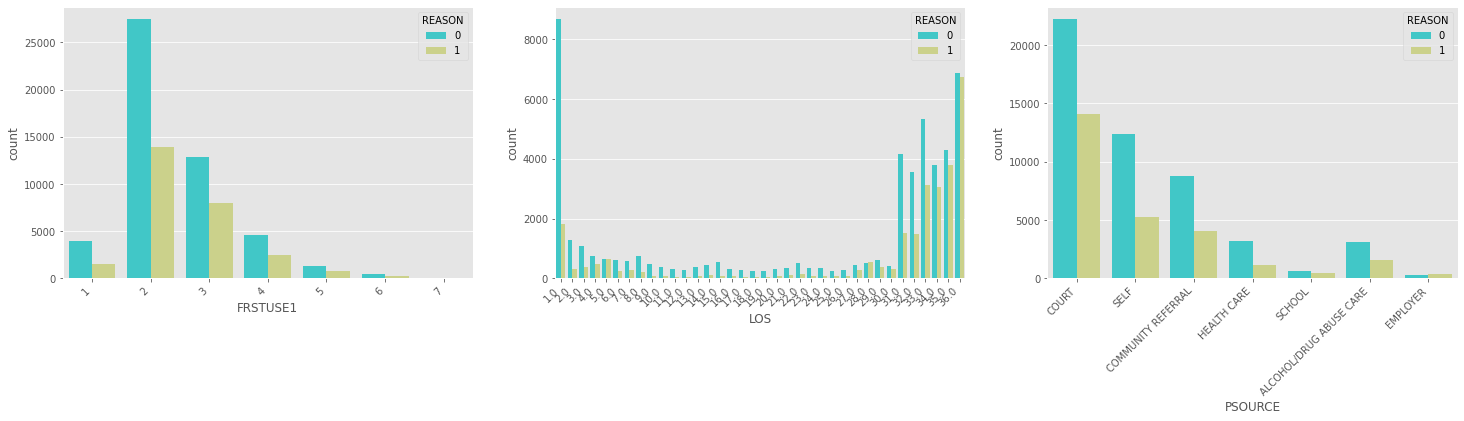

In [40]:
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
sns.countplot(data=final,x='GENDER',hue='REASON',ax=ax[0])
sns.countplot(data=final,x='SUB1',hue='REASON',palette='rainbow',ax=ax[1]).set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='ALCDRUG',hue='REASON',palette='rainbow',ax=ax[2]).set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='MARSTAT',hue='REASON',palette='rainbow',ax=ax[3])
fig.tight_layout()
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
sns.countplot(data=final,x='LIVARAG',hue='REASON',palette='rainbow',ax=ax[0])
sns.countplot(data=final,x='EMPLOY',hue='REASON',palette='rainbow',ax=ax[1])
sns.countplot(data=final,x='ARRESTS',hue='REASON',palette='rainbow',ax=ax[2])
sns.countplot(data=final,x='REGION',hue='REASON',palette='rainbow',ax=ax[3])
fig.tight_layout()
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
sns.countplot(data=final,x='VET',hue='REASON',palette='rainbow',ax=ax[0])
sns.countplot(data=final,x='METHUSE',hue='REASON',palette='rainbow',ax=ax[1])
sns.countplot(data=final,x='EDUC',hue='REASON',palette='rainbow',ax=ax[2]).set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='ROUTE1',hue='REASON',palette='rainbow',ax=ax[3])
fig.tight_layout()
fig, ax = plt.subplots(ncols=3,figsize=(25,5))
sns.countplot(data=final,x='FRSTUSE1',hue='REASON',palette='rainbow',ax=ax[0]).set_xticklabels(ax[0].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='LOS',hue='REASON',palette='rainbow',ax=ax[1]).set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='PSOURCE',hue='REASON',palette='rainbow',ax=ax[2]).set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right');

In [38]:
# # create a list of base-models
# def get_models():
# 	models = list()
# 	models.append(LinearRegression())
# 	models.append(ElasticNet())
# 	models.append(DecisionTreeRegressor())
# 	# models.append(KNeighborsRegressor())
# 	models.append(AdaBoostRegressor())
# 	models.append(BaggingRegressor(n_estimators=10))
# 	models.append(RandomForestRegressor(n_estimators=10))
# 	models.append(ExtraTreesRegressor(n_estimators=10))
# 	return models

In [39]:
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from mlens.ensemble import SuperLearner
 
# # create a list of base-models
# def get_models():
# 	models = list()
# 	models.append(LogisticRegression(solver='liblinear'))
# 	models.append(DecisionTreeClassifier())
# 	models.append(SVC(gamma='scale', probability=True))
# 	models.append(GaussianNB())
# 	# models.append(KNeighborsClassifier())
# 	models.append(AdaBoostClassifier())
# 	models.append(BaggingClassifier(n_estimators=10))
# 	models.append(RandomForestClassifier(n_estimators=10))
# 	models.append(ExtraTreesClassifier(n_estimators=10))
# 	return models
 
# # create the super learner
# def get_super_learner(X):
# 	ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
# 	# add base models
# 	models = get_models()
# 	ensemble.add(models)
# 	# add the meta model
# 	ensemble.add_meta(LogisticRegression(solver='lbfgs'))
# 	return ensemble
 
# # create the inputs and outputs
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# # split
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
# print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# # create the super learner
# ensemble = get_super_learner(X)
# # fit the super learner
# ensemble.fit(X, y)
# # summarize base learners
# print(ensemble.data)
# # make predictions on hold out set
# yhat = ensemble.predict(X_val)
# print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))